<h2 style="text-align:center;">STRESS DETECTION MODEL</h2>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Objective
Have you ever been at a stressful point in your life? How would you feel if you had a platform where immediately you lashed out your emotions, you promptly receive help to adress your specific needs? Anxiety, depression, and stress are all threats to people's mental health. People frequently express their emotions on social media platforms such as Instagram in the form of posts and stories, and on Reddit in the form of requests for suggestions about their lives on subreddits. Many content creators have stepped forward in recent years to create content that will assist people with their mental health. Many organisations can use stress detection in their research or train their own models to assist people in such situations.


## About The Data
The source of the dataset is Kaggle. It has 116 columns. We only use the text and label column for this task. The dataset contains data posted on 'subreddits' related to mental health. This dataset contains various mental health problems shared by people about their life. The dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress. 


## Contents
- Loading the Libraries
- The Data at a Glance
- Data Cleaning
- Stress Detection Model
    - Splitting Into Training and Test Data
    - Training the Model
    - Testing the Model's Performance

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading The Libraries:

In [1]:
import pandas as pd
import numpy as np

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The Data at a Glance:

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")

print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Data Cleaning

### Checking for null values

In [3]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


This data does not seem to contain any null values so we proceed.

### Now let’s prepare the text columns of this dataset by cleaning the text columns with stopwords, links, special symbols and language errors

We use the Natural Language Toolkit (nltk) and the regular expressions (re) modules for this text processing and analysis. ``nltk`` is a powerful library for working with human language data (text). It provides easy-to-use interfaces to perform tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more. 
``re`` is the module for regular expressions in Python. Regular expressions are powerful tools for pattern matching and text manipulation. 

In [4]:
# Importing the necessary libraries
import nltk
import re

nltk.download('stopwords')

# Stem words in the English language
stemmer = nltk.SnowballStemmer("english")

# Imports the NLTK corpus of stopwords
from nltk.corpus import stopwords

#Removes punctuations
import string

stopword = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Cleaning the text column
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["text"] = data["text"].apply(clean)

### What are the most used words by people sharing about their life problems on social media? We find this by visualizing a word cloud of the text column.

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

! pip install wordcloud

!pip install --upgrade wordcloud

!pip install --upgrade pillow

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Requirement already up-to-date: wordcloud in c:\users\user\anaconda3\lib\site-packages (1.9.3)
Requirement already up-to-date: pillow in c:\users\user\anaconda3\lib\site-packages (9.5.0)


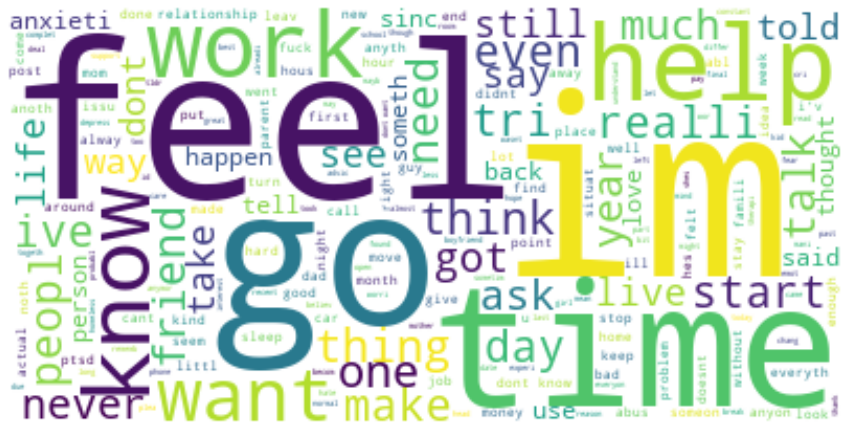

In [7]:
# Creating the word cloud

text = " ".join(i for i in data.text)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Stress Detection Model

The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress. We use Stress and No stress labels instead of 1 and 0. So we prepare this column accordingly and select the text and label columns for the process of training a machine learning model.

In [8]:
# Replace numerical labels in the 'label' column of the DataFrame with corresponding string labels
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})

# DataFrame (data) now contains only the 'text' and 'label' columns.
data = data[["text", "label"]]

print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


### Now we will split this dataset into training and test sets

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Extracting text and labels from the DataFrame
x = np.array(data["text"])
y = np.array(data["label"])

# Instantiate the CountVectorizer
cv = CountVectorizer()

# Transform the text data into a bag-of-words representation
X = cv.fit_transform(x)

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

## Training the model

As this task is based on the problem of binary classification, we will be using the Bernoulli Naive Bayes algorithm.

In [10]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## Testing the Model's Performance

Now let’s test the performance of our model on some random sentences based on mental health.

In [14]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Sometimes I feel like I need some help
['Stress']


In [13]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: I am very happy today
['No Stress']
